In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as  stats
from scipy.stats import skew
import seaborn as sns
from scipy.stats import norm, kurtosis

In [71]:
demo_2017_2020 = pd.read_sas("demographic/demo_2017_2020.XPT");
demo_2015_2016 = pd.read_sas("demographic/demo_2015_2016.XPT");
demo_2013_2014 = pd.read_sas("demographic/demo_2013_2014.XPT");
demo_2011_2012 = pd.read_sas("demographic/demo_2011_2012.XPT");
demo_2009_2010 = pd.read_sas("demographic/demo_2009_2010.XPT");
demo_2007_2008 = pd.read_sas("demographic/demo_2007_2008.XPT");

In [72]:
demo_17_20_list = demo_2017_2020.columns.tolist()

In [73]:
demo_15_16_list = demo_2015_2016.columns.tolist()

In [74]:
demo_13_14_list = demo_2013_2014.columns.tolist()

In [75]:
demo_11_12_list = demo_2011_2012.columns.tolist()

In [76]:
demo_09_10_list = demo_2009_2010.columns.tolist()

In [77]:
demo_07_08_list = demo_2007_2008.columns.tolist()

In [78]:
intersect_col = set(demo_17_20_list).intersection(demo_15_16_list).intersection(demo_13_14_list).intersection(demo_11_12_list).intersection(demo_09_10_list).intersection(demo_07_08_list)

In [79]:
#intersect_col

In [80]:
demo_17_20_filtered = pd.DataFrame(demo_2017_2020, columns=intersect_col)
demo_17_20_filtered.shape[0]

15560

In [81]:
demo_15_16_filtered = pd.DataFrame(demo_2015_2016, columns=intersect_col)
demo_15_16_filtered.shape[0]

9971

In [82]:
demo_13_14_filtered = pd.DataFrame(demo_2013_2014, columns=intersect_col)
demo_13_14_filtered.shape[0]

10175

In [83]:
demo_11_12_filtered = pd.DataFrame(demo_2011_2012, columns=intersect_col)
demo_11_12_filtered.shape[0]

9756

In [84]:
demo_09_10_filtered = pd.DataFrame(demo_2009_2010, columns=intersect_col)
demo_09_10_filtered.shape[0]

10537

In [85]:
demo_07_08_filtered = pd.DataFrame(demo_2007_2008, columns=intersect_col)
demo_07_08_filtered.shape[0]

10149

In [86]:
demo_final = demo_17_20_filtered.append(demo_15_16_filtered)
demo_final = demo_final.append(demo_13_14_filtered)
demo_final = demo_final.append(demo_11_12_filtered)
demo_final = demo_final.append(demo_09_10_filtered)
demo_final = demo_final.append(demo_07_08_filtered)
demo_final.shape[0]

C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\3570875556.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  demo_final = demo_17_20_filtered.append(demo_15_16_filtered)
C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\3570875556.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  demo_final = demo_final.append(demo_13_14_filtered)
C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\3570875556.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  demo_final = demo_final.append(demo_11_12_filtered)
C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\3570875556.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  demo_final = demo_final.append(

66148

In [87]:
demo_final.head()

,RIDRETH1,INDFMPIR,SIAINTRP,MIAINTRP,SDDSRVYR,SIAPROXY,SEQN,SDMVSTRA,FIAPROXY,RIDAGEYR,...,FIALANG,RIDEXPRG,FIAINTRP,RIDSTATR,MIALANG,SDMVPSU,RIDAGEMN,DMDEDUC2,RIAGENDR,MIAPROXY
0,5.0,4.66,2.0,NaN,66.0,1.0,109263.0,156.0,2.0,2.0,...,1.0,NaN,2.0,2.0,NaN,3.0,NaN,NaN,1.0,NaN
1,1.0,0.83,2.0,2.0,66.0,1.0,109264.0,155.0,2.0,13.0,...,1.0,NaN,2.0,2.0,1.0,1.0,NaN,NaN,2.0,2.0
2,3.0,3.06,2.0,NaN,66.0,1.0,109265.0,157.0,2.0,2.0,...,1.0,NaN,2.0,2.0,NaN,1.0,NaN,NaN,1.0,NaN
3,5.0,5.00,2.0,2.0,66.0,2.0,109266.0,168.0,2.0,29.0,...,1.0,2.0,2.0,2.0,1.0,2.0,NaN,5.0,2.0,2.0
4,2.0,5.00,2.0,NaN,66.0,2.0,109267.0,156.0,2.0,21.0,...,1.0,3.0,2.0,1.0,NaN,1.0,NaN,4.0,2.0,NaN


In [88]:
demo_final.head()

,RIDRETH1,INDFMPIR,SIAINTRP,MIAINTRP,SDDSRVYR,SIAPROXY,SEQN,SDMVSTRA,FIAPROXY,RIDAGEYR,...,FIALANG,RIDEXPRG,FIAINTRP,RIDSTATR,MIALANG,SDMVPSU,RIDAGEMN,DMDEDUC2,RIAGENDR,MIAPROXY
0,5.0,4.66,2.0,NaN,66.0,1.0,109263.0,156.0,2.0,2.0,...,1.0,NaN,2.0,2.0,NaN,3.0,NaN,NaN,1.0,NaN
1,1.0,0.83,2.0,2.0,66.0,1.0,109264.0,155.0,2.0,13.0,...,1.0,NaN,2.0,2.0,1.0,1.0,NaN,NaN,2.0,2.0
2,3.0,3.06,2.0,NaN,66.0,1.0,109265.0,157.0,2.0,2.0,...,1.0,NaN,2.0,2.0,NaN,1.0,NaN,NaN,1.0,NaN
3,5.0,5.00,2.0,2.0,66.0,2.0,109266.0,168.0,2.0,29.0,...,1.0,2.0,2.0,2.0,1.0,2.0,NaN,5.0,2.0,2.0
4,2.0,5.00,2.0,NaN,66.0,2.0,109267.0,156.0,2.0,21.0,...,1.0,3.0,2.0,1.0,NaN,1.0,NaN,4.0,2.0,NaN


In [89]:
#diet_2017_2020 = pd.read_sas("./demographic/demo_2017_2020.XPT");
#diet_2015_2016 = pd.read_sas("./demographic/demo_2015_2016.XPT");
#diet_2013_2014 = pd.read_sas("./demographic/demo_2013_2014.XPT");
#diet_2011_2012 = pd.read_sas("./demographic/demo_2011_2012.XPT");
#diet_2009_2010 = pd.read_sas("./demographic/demo_2009_2010.XPT");
#diet_2007_2008 = pd.read_sas("./demographic/demo_2007_2008.XPT");

In [90]:
def combinedata(_2017_2020,_2015_2016,_2013_2014,_2011_2012,_2009_2010,_2007_2008):
    _17_20_list = _2017_2020.columns.tolist()
    _15_16_list = _2015_2016.columns.tolist()
    _13_14_list = _2013_2014.columns.tolist()
    _11_12_list = _2011_2012.columns.tolist()
    _09_10_list = _2009_2010.columns.tolist()
    _07_08_list = _2007_2008.columns.tolist()
    
    intersect_col = set(_17_20_list).intersection(_15_16_list).intersection(_13_14_list).intersection(_11_12_list).intersection(_09_10_list).intersection(_07_08_list)
    
    _17_20_filtered = pd.DataFrame(_2017_2020, columns=intersect_col)
    _15_16_filtered = pd.DataFrame(_2015_2016, columns=intersect_col)
    _13_14_filtered = pd.DataFrame(_2013_2014, columns=intersect_col)
    _11_12_filtered = pd.DataFrame(_2011_2012, columns=intersect_col)
    _09_10_filtered = pd.DataFrame(_2009_2010, columns=intersect_col)
    _07_08_filtered = pd.DataFrame(_2007_2008, columns=intersect_col)
    print(intersect_col)
    
    _final = _17_20_filtered.append(_15_16_filtered)
    _final = _final.append(_13_14_filtered)
    _final = _final.append(_11_12_filtered)
    _final = _final.append(_09_10_filtered)
    _final = _final.append(_07_08_filtered)
    
    return _final

In [91]:
demo_2017_2020 = pd.read_sas("./demographic/demo_2017_2020.XPT");
demo_2015_2016 = pd.read_sas("./demographic/demo_2015_2016.XPT");
demo_2013_2014 = pd.read_sas("./demographic/demo_2013_2014.XPT");
demo_2011_2012 = pd.read_sas("./demographic/demo_2011_2012.XPT");
demo_2009_2010 = pd.read_sas("./demographic/demo_2009_2010.XPT");
demo_2007_2008 = pd.read_sas("./demographic/demo_2007_2008.XPT");

demo_final = combinedata(demo_2017_2020,demo_2015_2016,demo_2013_2014,demo_2011_2012,demo_2009_2010,demo_2007_2008)

{'RIDRETH1', 'INDFMPIR', 'SIAINTRP', 'MIAINTRP', 'SDDSRVYR', 'SIAPROXY', 'SEQN', 'SDMVSTRA', 'FIAPROXY', 'RIDAGEYR', 'RIDEXMON', 'SIALANG', 'FIALANG', 'RIDEXPRG', 'FIAINTRP', 'RIDSTATR', 'MIALANG', 'SDMVPSU', 'RIDAGEMN', 'DMDEDUC2', 'RIAGENDR', 'MIAPROXY'}


C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\2371506876.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _final = _17_20_filtered.append(_15_16_filtered)
C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\2371506876.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _final = _final.append(_13_14_filtered)
C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\2371506876.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _final = _final.append(_11_12_filtered)
C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\2371506876.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _final = _final.append(_09_10_filtered)
C:\Users\galeb\AppData\

In [92]:
diet_2017_2020 = pd.read_sas("./diet/diet_17_20.XPT");
diet_2015_2016 = pd.read_sas("./diet/diet_15_16.XPT");
diet_2013_2014 = pd.read_sas("./diet/diet_13_14.XPT");
diet_2011_2012 = pd.read_sas("./diet/diet_11_12.XPT");
diet_2009_2010 = pd.read_sas("./diet/diet_09_10.XPT");
diet_2007_2008 = pd.read_sas("./diet/diet_07_08.XPT");

diet_final = combinedata(diet_2017_2020,diet_2015_2016,diet_2013_2014,diet_2011_2012,diet_2009_2010,diet_2007_2008)

{'DSQTFIBE', 'DSQTMFAT', 'DSQTSELE', 'DSQTVB2', 'DSQTCAFF', 'DSQTCARB', 'DSQTLZ', 'DSQTKCAL', 'DSQTCHOL', 'DSQTVB12', 'SEQN', 'DSQTVB1', 'DSQTCOPP', 'DSQTTFAT', 'DSQTZINC', 'DSQTNIAC', 'DSQTLYCO', 'DSQTCHL', 'DSQTCALC', 'DSD010', 'DSQTFA', 'DSQTVB6', 'DSQTMAGN', 'DSQTVD', 'DSQTVC', 'DSQTPHOS', 'DSQTIRON', 'DSQTFDFE', 'DSDCOUNT', 'DSD010AN', 'DSQTSODI', 'DSQTSUGR', 'DSDANCNT', 'DSQTPOTA', 'DSQTSFAT', 'DSQTPFAT', 'DSQTVK', 'DSQTPROT'}


C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\2371506876.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _final = _17_20_filtered.append(_15_16_filtered)
C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\2371506876.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _final = _final.append(_13_14_filtered)
C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\2371506876.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _final = _final.append(_11_12_filtered)
C:\Users\galeb\AppData\Local\Temp\ipykernel_2884\2371506876.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  _final = _final.append(_09_10_filtered)
C:\Users\galeb\AppData\

In [ ]:
#blood pressure info for labelling

bp_2017_2020 = pd.read_sas("./bp/bp_17_20.XPT");
bp_2015_2016 = pd.read_sas("./bp/bp_15_16.XPT");
bp_2013_2014 = pd.read_sas("./bp/bp_13_14.XPT");
bp_2011_2012 = pd.read_sas("./bp/bp_11_12.XPT");
bp_2009_2010 = pd.read_sas("./bp/bp_09_10.XPT");
bp_2007_2008 = pd.read_sas("./bp/bp_07_08.XPT");

bp_final = combinedata(bp_2017_2020,bp_2015_2016,bp_2013_2014,bp_2011_2012,bp_2009_2010,bp_2007_2008)

In [ ]:
#alcohol data
#alc_2017_2020 have different column names compared to prev years

alc_2017_2020 = pd.read_sas("./alcohol/alc_17_20.XPT");
alc_2015_2016 = pd.read_sas("./alcohol/alc_15_16.XPT");
alc_2013_2014 = pd.read_sas("./alcohol/alc_13_14.XPT");
alc_2011_2012 = pd.read_sas("./alcohol/alc_11_12.XPT");
alc_2009_2010 = pd.read_sas("./alcohol/alc_09_10.XPT");
alc_2007_2008 = pd.read_sas("./alcohol/alc_07_08.XPT");

alc_final = combinedata(alc_2017_2020,alc_2015_2016,alc_2013_2014,alc_2011_2012,alc_2009_2010,alc_2007_2008)

{'ALQ130', 'SEQN'}


In [ ]:
print(alc_2017_2020.columns)
print(alc_2015_2016.columns)
print(alc_2013_2014.columns)

Index(['SEQN', 'ALQ111', 'ALQ121', 'ALQ130', 'ALQ142', 'ALQ270', 'ALQ280',
       'ALQ290', 'ALQ151', 'ALQ170'],
      dtype='object')
Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ120Q', 'ALQ120U', 'ALQ130', 'ALQ141Q',
       'ALQ141U', 'ALQ151', 'ALQ160'],
      dtype='object')
Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ120Q', 'ALQ120U', 'ALQ130', 'ALQ141Q',
       'ALQ141U', 'ALQ151', 'ALQ160'],
      dtype='object')


In [ ]:
#total cholesterol data

tchol_2017_2020 = pd.read_sas("./cholesterol/tchol_17_20.XPT");
tchol_2015_2016 = pd.read_sas("./cholesterol/tchol_15_16.XPT");
tchol_2013_2014 = pd.read_sas("./cholesterol/tchol_13_14.XPT");
tchol_2011_2012 = pd.read_sas("./cholesterol/tchol_11_12.XPT");
tchol_2009_2010 = pd.read_sas("./cholesterol/tchol_09_10.XPT");
tchol_2007_2008 = pd.read_sas("./cholesterol/tchol_07_08.XPT");

tchol_final = combinedata(tchol_2017_2020,tchol_2015_2016,tchol_2013_2014,tchol_2011_2012,tchol_2009_2010,tchol_2007_2008)

{'LBXTC', 'SEQN', 'LBDTCSI'}


In [ ]:
#diabetes data

di_2017_2020 = pd.read_sas("./diabetes/diabetes_17_20.XPT");
di_2015_2016 = pd.read_sas("./diabetes/diabetes_15_16.XPT");
di_2013_2014 = pd.read_sas("./diabetes/diabetes_13_14.XPT");
di_2011_2012 = pd.read_sas("./diabetes/diabetes_11_12.XPT");
di_2009_2010 = pd.read_sas("./diabetes/diabetes_09_10.XPT");
di_2007_2008 = pd.read_sas("./diabetes/diabetes_07_08.XPT");

diabetes_final = combinedata(di_2017_2020,di_2015_2016,di_2013_2014,di_2011_2012,di_2009_2010,di_2007_2008)

{'DIQ180', 'DIQ080', 'DIQ010', 'DIQ050', 'DID060', 'SEQN', 'DID250', 'DIQ260U', 'DIQ060U', 'DIQ230', 'DIQ350U', 'DID260', 'DID350', 'DIQ360', 'DIQ160', 'DID040', 'DIQ240'}


In [ ]:
#income data

inc_2017_2020 = pd.read_sas("./income/inc_17_20.XPT");
inc_2015_2016 = pd.read_sas("./income/inc_15_16.XPT");
inc_2013_2014 = pd.read_sas("./income/inc_13_14.XPT");
inc_2011_2012 = pd.read_sas("./income/inc_11_12.XPT");
inc_2009_2010 = pd.read_sas("./income/inc_09_10.XPT");
inc_2007_2008 = pd.read_sas("./income/inc_07_08.XPT");

income_final = combinedata(inc_2017_2020,inc_2015_2016,inc_2013_2014,inc_2011_2012,inc_2009_2010,inc_2007_2008)

{'INDFMMPI', 'INDFMMPC', 'SEQN'}


In [ ]:
#kidney disease data

kid_2017_2020 = pd.read_sas("./kidney/kidney_17_20.XPT");
kid_2015_2016 = pd.read_sas("./kidney/kidney_15_16.XPT");
kid_2013_2014 = pd.read_sas("./kidney/kidney_13_14.XPT");
kid_2011_2012 = pd.read_sas("./kidney/kidney_11_12.XPT");
kid_2009_2010 = pd.read_sas("./kidney/kidney_09_10.XPT");
kid_2007_2008 = pd.read_sas("./kidney/kidney_07_08.XPT");

kidney_final = combinedata(kid_2017_2020,kid_2015_2016,kid_2013_2014,kid_2011_2012,kid_2009_2010,kid_2007_2008)

{'KIQ450', 'KIQ005', 'KIQ042', 'KIQ044', 'KIQ052', 'KIQ046', 'SEQN', 'KIQ050', 'KIQ026', 'KIQ430', 'KIQ025', 'KIQ010', 'KIQ470', 'KIQ480', 'KIQ022'}


In [ ]:
#physical activity data

pa_2017_2020 = pd.read_sas("./physical activity/pa_17_20.XPT");
pa_2015_2016 = pd.read_sas("./physical activity/pa_15_16.XPT");
pa_2013_2014 = pd.read_sas("./physical activity/pa_13_14.XPT");
pa_2011_2012 = pd.read_sas("./physical activity/pa_11_12.XPT");
pa_2009_2010 = pd.read_sas("./physical activity/pa_09_10.XPT");
pa_2007_2008 = pd.read_sas("./physical activity/pa_07_08.XPT");

pa_final = combinedata(pa_2017_2020,pa_2015_2016,pa_2013_2014,pa_2011_2012,pa_2009_2010,pa_2007_2008)

{'PAQ665', 'PAQ610', 'PAD630', 'PAQ625', 'PAD645', 'PAD660', 'PAQ650', 'PAQ605', 'PAQ635', 'PAD675', 'PAD680', 'SEQN', 'PAQ620', 'PAQ640', 'PAQ655', 'PAQ670', 'PAD615'}


In [ ]:
#smoking status data

smoke_2017_2020 = pd.read_sas("./smoke/smoke_17_20.XPT");
smoke_2015_2016 = pd.read_sas("./smoke/smoke_15_16.XPT");
smoke_2013_2014 = pd.read_sas("./smoke/smoke_13_14.XPT");
smoke_2011_2012 = pd.read_sas("./smoke/smoke_11_12.XPT");
smoke_2009_2010 = pd.read_sas("./smoke/smoke_09_10.XPT");
smoke_2007_2008 = pd.read_sas("./smoke/smoke_07_08.XPT");

smoke_final = combinedata(smoke_2017_2020,smoke_2015_2016,smoke_2013_2014,smoke_2011_2012,smoke_2009_2010,smoke_2007_2008)

{'SMAQUEX2', 'SMD650', 'SMD100FL', 'SEQN', 'SMQ040', 'SMD100MN', 'SMQ020', 'SMD641', 'SMQ050Q', 'SMD630', 'SMD030', 'SMD057', 'SMQ050U', 'SMQ670'}


In [ ]:
#triglycerides data
#2017-2020 data have some different columns

trigly_2017_2020 = pd.read_sas("./triglycerides/trigly_17_20.XPT");
trigly_2015_2016 = pd.read_sas("./triglycerides/trigly_15_16.XPT");
trigly_2013_2014 = pd.read_sas("./triglycerides/trigly_13_14.XPT");
trigly_2011_2012 = pd.read_sas("./triglycerides/trigly_11_12.XPT");
trigly_2009_2010 = pd.read_sas("./triglycerides/trigly_09_10.XPT");
trigly_2007_2008 = pd.read_sas("./triglycerides/trigly_07_08.XPT");

trigly_final = combinedata(trigly_2017_2020,trigly_2015_2016,trigly_2013_2014,trigly_2011_2012,trigly_2009_2010,trigly_2007_2008)

{'LBXTR', 'LBDLDLSI', 'LBDTRSI', 'LBDLDL', 'SEQN'}


In [ ]:
print(trigly_2017_2020.columns)
print(trigly_2015_2016.columns)
print(trigly_2013_2014.columns)

Index(['SEQN', 'WTSAFPRP', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBDLDLM',
       'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI'],
      dtype='object')
Index(['SEQN', 'WTSAF2YR', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI'], dtype='object')
Index(['SEQN', 'WTSAF2YR', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI'], dtype='object')


In [ ]:
#weight data

weight_2017_2020 = pd.read_sas("./weight/weight_17_20.XPT");
weight_2015_2016 = pd.read_sas("./weight/weight_15_16.XPT");
weight_2013_2014 = pd.read_sas("./weight/weight_13_14.XPT");
weight_2011_2012 = pd.read_sas("./weight/weight_11_12.XPT");
weight_2009_2010 = pd.read_sas("./weight/weight_09_10.XPT");
weight_2007_2008 = pd.read_sas("./weight/weight_07_08.XPT");

weight_final = combinedata(weight_2017_2020,weight_2015_2016,weight_2013_2014,weight_2011_2012,weight_2009_2010,weight_2007_2008)

{'BMIWAIST', 'BMDSTATS', 'BMXHT', 'BMIARML', 'BMXBMI', 'BMXARML', 'BMXRECUM', 'BMXLEG', 'BMIARMC', 'BMIHT', 'BMIWT', 'BMIRECUM', 'BMXWT', 'BMIHEAD', 'BMILEG', 'SEQN', 'BMXHEAD', 'BMXARMC', 'BMXWAIST'}


In [ ]:
#blood pressure reading
#2017-2020 data have different column names

bprdg_2017_2020 = pd.read_sas("./blood pressure reading/bp_rdg_os_17_20.XPT");
bprdg_2015_2016 = pd.read_sas("./blood pressure reading/bp_rdg_15_16.XPT");
bprdg_2013_2014 = pd.read_sas("./blood pressure reading/bp_rdg_13_14.XPT");
bprdg_2011_2012 = pd.read_sas("./blood pressure reading/bp_rdg_11_12.XPT");
bprdg_2009_2010 = pd.read_sas("./blood pressure reading/bp_rdg_09_10.XPT");
bprdg_2007_2008 = pd.read_sas("./blood pressure reading/bp_rdg_07_08.XPT");

In [ ]:
print(bprdg_2017_2020.columns)
print(bprdg_2015_2016.columns)

Index(['SEQN', 'BPAOARM', 'BPAOCSZ', 'BPXOSY1', 'BPXODI1', 'BPXOSY2',
       'BPXODI2', 'BPXOSY3', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3'],
      dtype='object')
Index(['SEQN', 'PEASCCT1', 'BPXCHR', 'BPAARM', 'BPACSZ', 'BPXPLS', 'BPXPULS',
       'BPXPTY', 'BPXML1', 'BPXSY1', 'BPXDI1', 'BPAEN1', 'BPXSY2', 'BPXDI2',
       'BPAEN2', 'BPXSY3', 'BPXDI3', 'BPAEN3', 'BPXSY4', 'BPXDI4', 'BPAEN4'],
      dtype='object')


In [ ]:
def combinedata_v2(_2015_2016,_2013_2014,_2011_2012,_2009_2010,_2007_2008):
    _15_16_list = _2015_2016.columns.tolist()
    _13_14_list = _2013_2014.columns.tolist()
    _11_12_list = _2011_2012.columns.tolist()
    _09_10_list = _2009_2010.columns.tolist()
    _07_08_list = _2007_2008.columns.tolist()
    
    intersect_col = set(_15_16_list).intersection(_13_14_list).intersection(_11_12_list).intersection(_09_10_list).intersection(_07_08_list)
    
    _15_16_filtered = pd.DataFrame(_2015_2016, columns=intersect_col)
    _13_14_filtered = pd.DataFrame(_2013_2014, columns=intersect_col)
    _11_12_filtered = pd.DataFrame(_2011_2012, columns=intersect_col)
    _09_10_filtered = pd.DataFrame(_2009_2010, columns=intersect_col)
    _07_08_filtered = pd.DataFrame(_2007_2008, columns=intersect_col)
    print(intersect_col)
    
    _final = _15_16_filtered.append(_13_14_filtered)
    _final = _final.append(_11_12_filtered)
    _final = _final.append(_09_10_filtered)
    _final = _final.append(_07_08_filtered)
    
    return _final

In [ ]:
col= bprdg_2017_2020.loc[:,'BPXOPLS1':'BPXOPLS3']

bprdg_2017_2020['BPXPLS']= col.mean(axis=1)

In [ ]:
bprdg_final= combinedata_v2(bprdg_2015_2016,bprdg_2013_2014,bprdg_2011_2012,bprdg_2009_2010,bprdg_2007_2008)
bprdg_final= bprdg_final.append(bprdg_2017_2020)

{'BPXML1', 'BPAARM', 'BPAEN2', 'BPXPLS', 'BPXDI1', 'BPXSY2', 'BPXPTY', 'BPXSY1', 'BPACSZ', 'BPXDI3', 'BPAEN1', 'BPAEN4', 'BPXDI4', 'BPXCHR', 'BPXDI2', 'BPAEN3', 'BPXSY3', 'BPXSY4', 'SEQN', 'BPXPULS', 'PEASCCT1'}


In [ ]:
bprdg_final.columns

Index(['BPXML1', 'BPAARM', 'BPAEN2', 'BPXPLS', 'BPXDI1', 'BPXSY2', 'BPXPTY',
       'BPXSY1', 'BPACSZ', 'BPXDI3', 'BPAEN1', 'BPAEN4', 'BPXDI4', 'BPXCHR',
       'BPXDI2', 'BPAEN3', 'BPXSY3', 'BPXSY4', 'SEQN', 'BPXPULS', 'PEASCCT1',
       'BPAOARM', 'BPAOCSZ', 'BPXOSY1', 'BPXODI1', 'BPXOSY2', 'BPXODI2',
       'BPXOSY3', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3'],
      dtype='object')

In [ ]:
final_df= pd.merge(demo_final, diet_final,on=['SEQN'])
final_df= pd.merge(final_df, alc_final,on=['SEQN'])
final_df= pd.merge(final_df, tchol_final,on=['SEQN'])
final_df= pd.merge(final_df, diabetes_final,on=['SEQN'])
final_df= pd.merge(final_df, income_final,on=['SEQN'])
final_df= pd.merge(final_df, kidney_final,on=['SEQN'])
final_df= pd.merge(final_df, pa_final,on=['SEQN'])
final_df= pd.merge(final_df, smoke_final, on=['SEQN'])
final_df= pd.merge(final_df, trigly_final, on=['SEQN'])
final_df= pd.merge(final_df, weight_final, on=['SEQN'])
final_df= pd.merge(final_df, bprdg_final, on=['SEQN'])
final_df= pd.merge(final_df, bp_final, on=['SEQN'])


In [ ]:
final_df.shape

(17847, 186)

In [ ]:
final_df.BPQ020.value_counts()

2.0    11095
1.0     6729
9.0       23
Name: BPQ020, dtype: int64

In [ ]:
final_df.to_csv(r'C:\Users\chery\Desktop\Data301\project\final.csv', index=None)

In [77]:
final= pd.read_csv('final.csv')
final.shape

C:\Users\galeb\AppData\Local\Temp\ipykernel_7332\1734128874.py:1: DtypeWarning: Columns (165) have mixed types. Specify dtype option on import or set low_memory=False.
  final= pd.read_csv('final.csv')


(17847, 186)

In [78]:
final.set_index('SEQN')

,RIDAGEYR,SDMVSTRA,RIDRETH1,RIDAGEMN,RIAGENDR,FIAINTRP,INDFMPIR,SDDSRVYR,MIALANG,RIDEXMON,...,BPQ050A,BPQ090D,BPD035,BPQ070,BPQ100D,BPQ060,BPQ080,BPQ020,BPQ040A,BPQ030
SEQN,,,,,,,,,,,,,,,,,,,,,
109271.0,49.0,167.0,3.0,NaN,1.0,2.0,NaN,66.0,1.0,2.0,...,NaN,1.0,NaN,1.0,1.0,NaN,1.0,2.0,NaN,NaN
109274.0,68.0,167.0,5.0,NaN,1.0,2.0,1.20,66.0,1.0,1.0,...,1.0,1.0,54.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
109282.0,76.0,164.0,3.0,NaN,1.0,2.0,3.61,66.0,1.0,2.0,...,1.0,2.0,60.0,1.0,NaN,NaN,1.0,1.0,1.0,2.0
109286.0,33.0,154.0,5.0,NaN,2.0,2.0,1.36,66.0,NaN,1.0,...,NaN,2.0,NaN,1.0,NaN,1.0,2.0,2.0,NaN,NaN
109290.0,68.0,171.0,4.0,NaN,2.0,2.0,5.00,66.0,1.0,2.0,...,1.0,1.0,50.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51616.0,60.0,62.0,3.0,727.0,1.0,2.0,3.93,5.0,1.0,2.0,...,1.0,NaN,25.0,1.0,NaN,1.0,9.0,1.0,1.0,1.0
51617.0,71.0,69.0,2.0,862.0,2.0,2.0,2.84,5.0,2.0,1.0,...,1.0,NaN,51.0,1.0,NaN,1.0,2.0,1.0,1.0,1.0
51618.0,48.0,74.0,3.0,587.0,1.0,2.0,3.83,5.0,1.0,2.0,...,NaN,NaN,NaN,4.0,NaN,1.0,2.0,2.0,NaN,NaN


### Exploratory Data Analysis

In [79]:
#Extracting risk factors of hypertension into a new df


hyp_nhanes = pd.DataFrame().assign(ID = final['SEQN'],hypertension=final['BPQ020'],alc_cons=final['ALQ130'], 
income_pvrtind= final['INDFMMPI'],income_pvrtcat=final['INDFMMPC'],race=final['RIDRETH1'],
edu_lvl_adult=final['DMDEDUC2'],age=final['RIDAGEYR'],gender=final['RIAGENDR'],avg_cig30d=final['SMD650'],
smoke_now=final['SMQ040'],smoke_100xlife=final['SMQ020'],age_smoked_reg=final['SMD030'],chl_mgdl=final['LBXTC'],
bmi_index=final['BMXBMI'], weight_kg=final['BMXWT'],pulse=final['BPXPLS'],vig_act=final['PAQ605'],mod_act=final['PAQ620'],
vig_recre_ex=final['PAQ650'],mod_recre_ex=final['PAQ665'],triglyceride=final['LBXTR'],ldl_chol = final['LBDLDL'])

In [80]:
hyp_nhanes.head()

,ID,hypertension,alc_cons,income_pvrtind,income_pvrtcat,race,edu_lvl_adult,age,gender,avg_cig30d,...,chl_mgdl,bmi_index,weight_kg,pulse,vig_act,mod_act,vig_recre_ex,mod_recre_ex,triglyceride,ldl_chol
0,109271.0,2.0,NaN,1.20,1.0,3.0,2.0,49.0,1.0,20.0,...,147.0,29.7,98.8,71.333333,2.0,1.0,2.0,2.0,84.0,97.0
1,109274.0,1.0,2.0,1.20,1.0,5.0,4.0,68.0,1.0,NaN,...,105.0,30.2,103.7,NaN,1.0,1.0,2.0,1.0,133.0,49.0
2,109282.0,1.0,NaN,3.18,3.0,3.0,5.0,76.0,1.0,NaN,...,233.0,26.6,83.3,55.000000,2.0,2.0,2.0,2.0,132.0,164.0
3,109286.0,2.0,NaN,1.22,1.0,5.0,5.0,33.0,2.0,NaN,...,236.0,28.9,72.6,NaN,2.0,2.0,2.0,2.0,192.0,131.0
4,109290.0,1.0,NaN,4.80,3.0,4.0,5.0,68.0,2.0,NaN,...,165.0,28.1,73.0,58.000000,2.0,1.0,2.0,1.0,102.0,105.0


In [81]:
#Set ID as index
hyp_nhanes = hyp_nhanes.set_index('ID')

In [82]:
hyp_nhanes.shape


(17847, 22)

### Variables

In [83]:
#List of columns/features
hyp_nhanes.columns

Index(['hypertension', 'alc_cons', 'income_pvrtind', 'income_pvrtcat', 'race',
       'edu_lvl_adult', 'age', 'gender', 'avg_cig30d', 'smoke_now',
       'smoke_100xlife', 'age_smoked_reg', 'chl_mgdl', 'bmi_index',
       'weight_kg', 'pulse', 'vig_act', 'mod_act', 'vig_recre_ex',
       'mod_recre_ex', 'triglyceride', 'ldl_chol'],
      dtype='object')

In [84]:
hyp_nhanes.nunique()

hypertension         3
alc_cons            29
income_pvrtind     494
income_pvrtcat       5
race                 5
edu_lvl_adult        7
age                 61
gender               2
avg_cig30d          37
smoke_now            3
smoke_100xlife       4
age_smoked_reg      56
chl_mgdl           295
bmi_index         2428
weight_kg         1217
pulse              222
vig_act              4
mod_act              4
vig_recre_ex         2
mod_recre_ex         3
triglyceride       576
ldl_chol           253
dtype: int64

In [85]:
hyp_nhanes.dtypes

hypertension      float64
alc_cons          float64
income_pvrtind    float64
income_pvrtcat    float64
race              float64
edu_lvl_adult     float64
age               float64
gender            float64
avg_cig30d        float64
smoke_now         float64
smoke_100xlife    float64
age_smoked_reg    float64
chl_mgdl          float64
bmi_index         float64
weight_kg         float64
pulse             float64
vig_act           float64
mod_act           float64
vig_recre_ex      float64
mod_recre_ex      float64
triglyceride      float64
ldl_chol          float64
dtype: object

In [86]:
hyp_nhanes.dtypes.value_counts()

float64    22
dtype: int64

### Missing Values

In [87]:
#Count how many NaN values in the df
n_na = hyp_nhanes.isna().sum()
display(n_na)

hypertension          0
alc_cons           6908
income_pvrtind     2661
income_pvrtcat      933
race                  0
edu_lvl_adult         0
age                   0
gender                0
avg_cig30d        14281
smoke_now          9978
smoke_100xlife        1
age_smoked_reg     9978
chl_mgdl           1090
bmi_index           263
weight_kg           228
pulse              1256
vig_act               0
mod_act               0
vig_recre_ex          0
mod_recre_ex          0
triglyceride       1292
ldl_chol           1546
dtype: int64

In [88]:
#Calculating the percentage of missing values in each column
percentage_na= (hyp_nhanes.isna().sum() * 100 / len(hyp_nhanes)).round(2)

#Creating a new df
miss_val = pd.DataFrame({ 'Total Number of missing values':n_na,
                                 'Percentage of missing values': percentage_na})

#extract rows based on a condition
missing = miss_val['Percentage of missing values'] > 0
#New data frame with the extracted rows
NaN_df = pd.DataFrame(miss_val[missing])

print('Total number and percentage of missing values')
NaN_df

Total number and percentage of missing values


,Total Number of missing values,Percentage of missing values
alc_cons,6908,38.71
income_pvrtind,2661,14.91
income_pvrtcat,933,5.23
avg_cig30d,14281,80.02
smoke_now,9978,55.91
smoke_100xlife,1,0.01
age_smoked_reg,9978,55.91
chl_mgdl,1090,6.11
bmi_index,263,1.47
weight_kg,228,1.28


In [118]:
#Removing columns with more than 70% of missing values

percent = 70.0
min = int(((100-percent)/100)*hyp_nhanes.shape[0] + 1)
hyp = hyp_nhanes.dropna(axis=1,thresh=min)

hyp


,hypertension,alc_cons,income_pvrtind,income_pvrtcat,race,edu_lvl_adult,age,gender,smoke_now,smoke_100xlife,...,chl_mgdl,bmi_index,weight_kg,pulse,vig_act,mod_act,vig_recre_ex,mod_recre_ex,triglyceride,ldl_chol
ID,,,,,,,,,,,,,,,,,,,,,
109271.0,2.0,NaN,1.20,1.0,3.0,2.0,49.0,1.0,1.0,1.0,...,147.0,29.70,98.8,71.333333,2.0,1.0,2.0,2.0,84.0,97.0
109274.0,1.0,2.0,1.20,1.0,5.0,4.0,68.0,1.0,NaN,2.0,...,105.0,30.20,103.7,NaN,1.0,1.0,2.0,1.0,133.0,49.0
109282.0,1.0,NaN,3.18,3.0,3.0,5.0,76.0,1.0,3.0,1.0,...,233.0,26.60,83.3,55.000000,2.0,2.0,2.0,2.0,132.0,164.0
109286.0,2.0,NaN,1.22,1.0,5.0,5.0,33.0,2.0,NaN,2.0,...,236.0,28.90,72.6,NaN,2.0,2.0,2.0,2.0,192.0,131.0
109290.0,1.0,NaN,4.80,3.0,4.0,5.0,68.0,2.0,NaN,2.0,...,165.0,28.10,73.0,58.000000,2.0,1.0,2.0,1.0,102.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51616.0,1.0,3.0,3.86,3.0,3.0,3.0,60.0,1.0,1.0,1.0,...,173.0,42.40,142.6,74.000000,2.0,2.0,2.0,2.0,127.0,76.0
51617.0,1.0,1.0,2.73,3.0,2.0,1.0,71.0,2.0,NaN,2.0,...,171.0,30.97,77.9,68.000000,2.0,2.0,2.0,2.0,76.0,88.0
51618.0,2.0,NaN,3.82,3.0,3.0,5.0,48.0,1.0,NaN,2.0,...,192.0,29.96,90.6,78.000000,2.0,2.0,2.0,2.0,103.0,124.0


In [119]:
#Total number of missing values left

total_miss = hyp.isna().sum().sum()

print("Total number of missing values in the modified data set:" + str(total_miss))

Total number of missing values in the modified data set:36134


In [120]:
#Total number of data
hyp.shape


(17847, 21)

In [121]:
total_df = 17847*21

#Percentage of missing data in the modified df
perc_miss = ((total_miss/total_df)*100).round(2)

print('Percentage of missing values in the dataset :'+ str(perc_miss))

Percentage of missing values in the dataset :9.64


Only 9.64% of the hyp df have missing values, thus removing them should not affect the data set.

In [122]:
#Remove al NaN
hyp_df = hyp.dropna()
hyp_df

,hypertension,alc_cons,income_pvrtind,income_pvrtcat,race,edu_lvl_adult,age,gender,smoke_now,smoke_100xlife,...,chl_mgdl,bmi_index,weight_kg,pulse,vig_act,mod_act,vig_recre_ex,mod_recre_ex,triglyceride,ldl_chol
ID,,,,,,,,,,,,,,,,,,,,,
109330.0,1.0,2.0,2.130000e+00,3.0,5.0,4.0,76.0,1.0,3.0,1.0,...,164.0,23.30,61.5,67.333333,2.0,2.0,2.0,1.0,66.0,67.0
109335.0,1.0,6.0,5.397605e-79,1.0,4.0,3.0,55.0,2.0,1.0,1.0,...,183.0,39.60,107.2,64.000000,1.0,1.0,2.0,2.0,111.0,109.0
109342.0,2.0,4.0,1.190000e+00,1.0,3.0,4.0,43.0,2.0,1.0,1.0,...,240.0,35.50,92.1,71.000000,2.0,2.0,2.0,1.0,90.0,161.0
109365.0,2.0,4.0,9.900000e-01,1.0,2.0,4.0,49.0,2.0,1.0,1.0,...,191.0,32.00,85.4,62.000000,2.0,2.0,2.0,2.0,62.0,115.0
109377.0,2.0,2.0,1.560000e+00,2.0,3.0,3.0,41.0,1.0,1.0,1.0,...,170.0,29.40,88.7,63.000000,2.0,2.0,2.0,1.0,133.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51558.0,2.0,6.0,1.050000e+00,1.0,4.0,3.0,56.0,2.0,1.0,1.0,...,167.0,24.59,60.6,66.000000,2.0,2.0,2.0,2.0,77.0,70.0
51576.0,1.0,6.0,1.400000e+00,2.0,1.0,1.0,51.0,1.0,1.0,1.0,...,196.0,36.66,99.2,68.000000,2.0,2.0,2.0,2.0,189.0,120.0
51611.0,2.0,1.0,4.190000e+00,3.0,3.0,4.0,55.0,2.0,1.0,1.0,...,253.0,25.81,68.4,90.000000,2.0,2.0,2.0,2.0,178.0,167.0


In [123]:
hyp_df.shape

(4072, 21)

### Stats

In [124]:
#Summary Statistics
display(hyp_df.describe().round(2))

,hypertension,alc_cons,income_pvrtind,income_pvrtcat,race,edu_lvl_adult,age,gender,smoke_now,smoke_100xlife,...,chl_mgdl,bmi_index,weight_kg,pulse,vig_act,mod_act,vig_recre_ex,mod_recre_ex,triglyceride,ldl_chol
count,4072.00,4072.00,4072.00,4072.00,4072.00,4072.00,4072.00,4072.00,4072.00,4072.0,...,4072.00,4072.00,4072.00,4072.00,4072.00,4072.00,4072.00,4072.00,4072.00,4072.00
mean,1.64,5.32,2.27,2.12,3.04,3.42,49.69,1.40,2.15,1.0,...,190.52,29.04,83.94,71.17,1.74,1.56,1.81,1.59,120.44,112.67
std,0.58,45.83,1.57,0.92,1.05,1.17,16.78,0.49,0.94,0.0,...,40.84,6.87,21.37,11.89,0.44,0.50,0.39,0.49,67.13,35.78
min,1.00,1.00,0.00,1.00,1.00,1.00,20.00,1.00,1.00,1.0,...,79.00,15.02,39.80,38.67,1.00,1.00,1.00,1.00,14.00,14.00
25%,1.00,1.00,0.99,1.00,3.00,3.00,36.00,1.00,1.00,1.0,...,162.00,24.26,69.10,62.00,1.00,1.00,2.00,1.00,73.00,88.00
50%,2.00,2.00,1.81,2.00,3.00,4.00,50.00,1.00,3.00,1.0,...,188.00,27.80,81.00,70.00,2.00,2.00,2.00,2.00,104.00,110.00
75%,2.00,4.00,3.48,3.00,4.00,4.00,63.00,2.00,3.00,1.0,...,215.00,32.50,95.00,78.00,2.00,2.00,2.00,2.00,152.00,134.00
max,9.00,999.00,5.00,3.00,5.00,7.00,80.00,2.00,3.00,1.0,...,406.00,74.80,204.60,141.33,2.00,2.00,2.00,2.00,397.00,341.00


In [107]:
hyp_df.hypertension.unique()

array([1., 2., 9.])

C:\Users\galeb\AppData\Local\Temp\ipykernel_7332\1214737464.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hyp_df.hist(ax=ax, grid=False, bins=10, color='green')


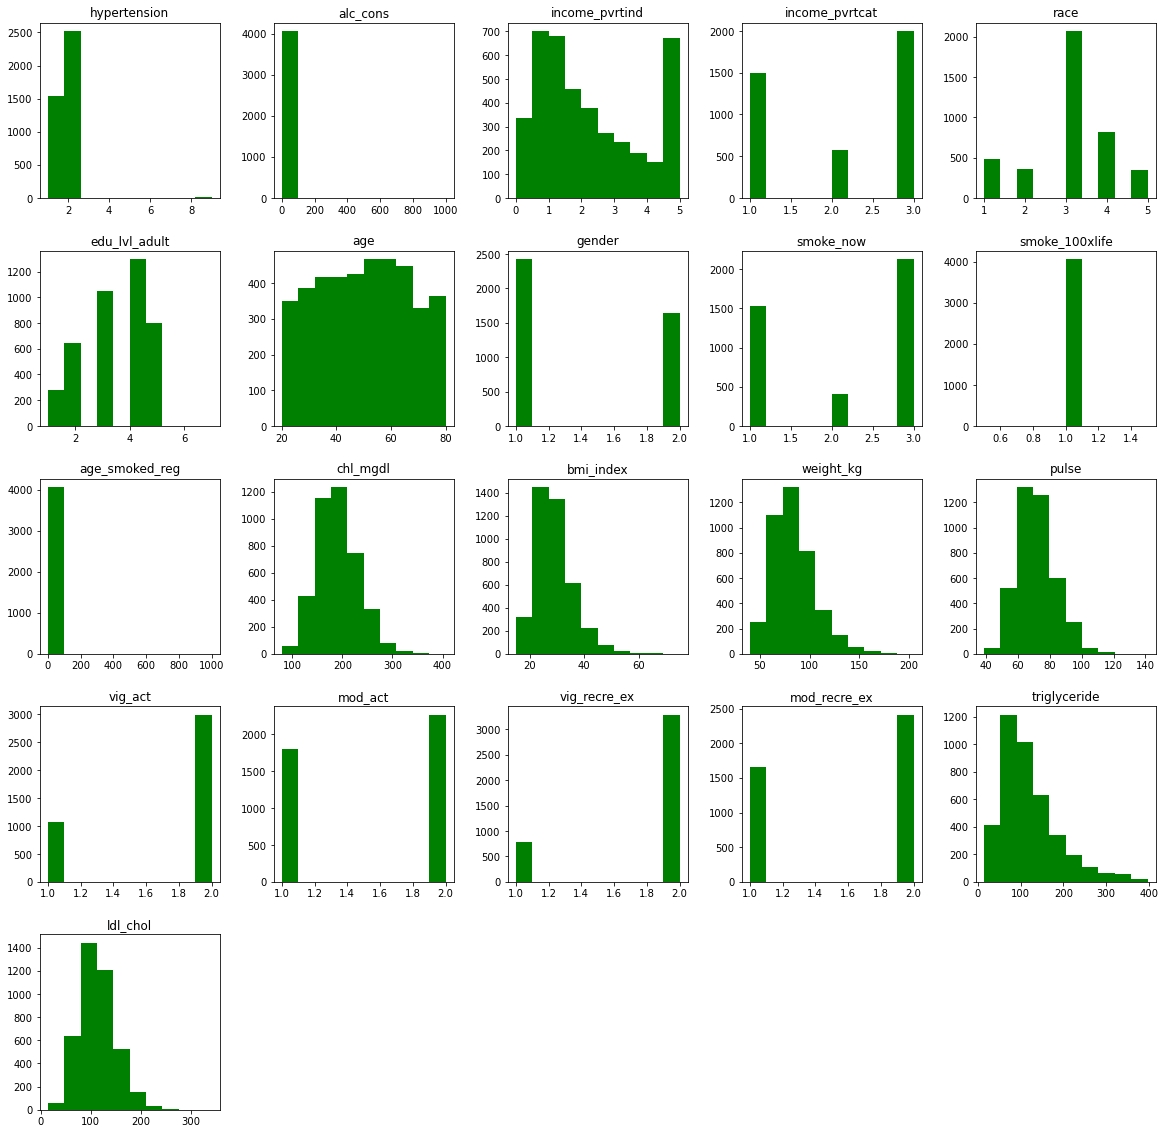

In [108]:
#Histograms - variables
fig = plt.figure(figsize = (20,20))
plt.title("Histogram of each feature")
ax = fig.gca()
hyp_df.hist(ax=ax, grid=False, bins=10, color='green')
plt.show()

### Relationship Analysis between variables

In [109]:
#Calculating spearman correlation between predictor variables and the target variable

import scipy 
import seaborn as sns
from scipy.stats import spearmanr
hyp_corr = hyp_df.corr(method='spearman').round(2)
hyp_corr


,hypertension,alc_cons,income_pvrtind,income_pvrtcat,race,edu_lvl_adult,age,gender,smoke_now,smoke_100xlife,...,chl_mgdl,bmi_index,weight_kg,pulse,vig_act,mod_act,vig_recre_ex,mod_recre_ex,triglyceride,ldl_chol
hypertension,1.00,0.10,-0.03,-0.03,-0.06,0.01,-0.38,-0.00,-0.09,NaN,...,0.05,-0.20,-0.17,0.00,-0.07,-0.06,-0.14,-0.04,-0.09,0.09
alc_cons,0.10,1.00,-0.19,-0.17,-0.09,-0.19,-0.34,-0.20,-0.25,NaN,...,-0.00,0.02,0.10,0.10,-0.11,-0.05,-0.05,0.05,0.05,-0.00
income_pvrtind,-0.03,-0.19,1.00,0.91,0.01,0.42,0.21,-0.02,0.30,NaN,...,0.04,-0.00,0.03,-0.06,0.06,0.00,-0.11,-0.18,-0.01,0.01
income_pvrtcat,-0.03,-0.17,0.91,1.00,0.01,0.37,0.19,-0.02,0.28,NaN,...,0.03,-0.01,0.03,-0.05,0.04,-0.01,-0.09,-0.15,-0.03,0.01
race,-0.06,-0.09,0.01,0.01,1.00,0.13,-0.01,0.01,-0.14,NaN,...,-0.06,-0.09,-0.02,-0.00,0.05,0.06,-0.05,-0.01,-0.16,-0.07
edu_lvl_adult,0.01,-0.19,0.42,0.37,0.13,1.00,0.04,0.10,0.22,NaN,...,0.01,-0.02,0.01,0.01,0.10,0.02,-0.17,-0.21,-0.06,-0.02
age,-0.38,-0.34,0.21,0.19,-0.01,0.04,1.00,-0.05,0.31,NaN,...,0.08,0.05,-0.01,-0.13,0.16,0.14,0.26,0.05,0.07,0.01
gender,-0.00,-0.20,-0.02,-0.02,0.01,0.10,-0.05,1.00,-0.04,NaN,...,0.09,0.07,-0.21,0.18,0.17,0.06,0.09,0.01,-0.06,0.01
smoke_now,-0.09,-0.25,0.30,0.28,-0.14,0.22,0.31,-0.04,1.00,NaN,...,0.02,0.14,0.11,-0.11,0.08,0.02,-0.06,-0.13,0.00,-0.00
smoke_100xlife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Heatmap : displaying the relationships between variables')

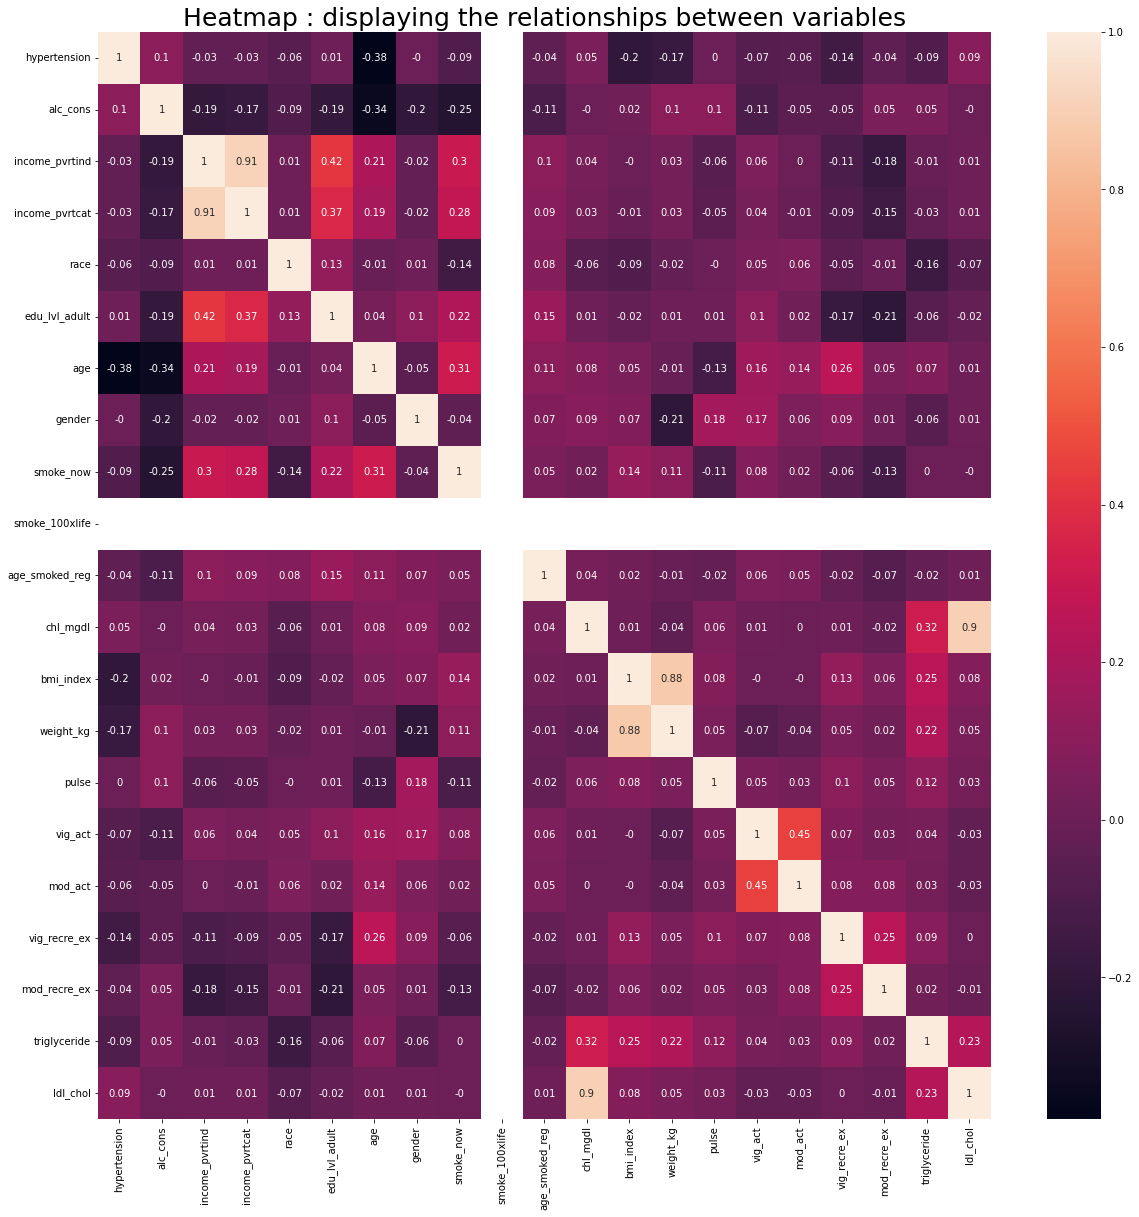

In [110]:
#Heatmap
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(hyp_corr,yticklabels=hyp_corr, annot= True)
plt.title('Heatmap : displaying the relationships between variables',
         fontsize=25)

Variables significantly correlated with each other:

- BMI and Weight
- Income index and Income category. 

BMI is a more useful indicator whether an individual is overweight and is obese. It is a measure of body percentage which can be an effecitive predictor of hypertension.

income_pvrtind (income_pvrtyind) represents the family monthly poverty index-  a ratio of family monthly income based on the HHS poverty guidelines.Income_pvrtcat are the catagories of these values. 


BMI and income_pvrtcat will be kept in the data set.

In [125]:
# Remove two columns name is 'weight' and 'income_pvrtind'
hypertension = hyp_df.drop(['weight_kg','income_pvrtind'], axis=1)
hypertension
  

,hypertension,alc_cons,income_pvrtcat,race,edu_lvl_adult,age,gender,smoke_now,smoke_100xlife,age_smoked_reg,chl_mgdl,bmi_index,pulse,vig_act,mod_act,vig_recre_ex,mod_recre_ex,triglyceride,ldl_chol
ID,,,,,,,,,,,,,,,,,,,
109330.0,1.0,2.0,3.0,5.0,4.0,76.0,1.0,3.0,1.0,24.0,164.0,23.30,67.333333,2.0,2.0,2.0,1.0,66.0,67.0
109335.0,1.0,6.0,1.0,4.0,3.0,55.0,2.0,1.0,1.0,23.0,183.0,39.60,64.000000,1.0,1.0,2.0,2.0,111.0,109.0
109342.0,2.0,4.0,1.0,3.0,4.0,43.0,2.0,1.0,1.0,14.0,240.0,35.50,71.000000,2.0,2.0,2.0,1.0,90.0,161.0
109365.0,2.0,4.0,1.0,2.0,4.0,49.0,2.0,1.0,1.0,16.0,191.0,32.00,62.000000,2.0,2.0,2.0,2.0,62.0,115.0
109377.0,2.0,2.0,2.0,3.0,3.0,41.0,1.0,1.0,1.0,19.0,170.0,29.40,63.000000,2.0,2.0,2.0,1.0,133.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51558.0,2.0,6.0,1.0,4.0,3.0,56.0,2.0,1.0,1.0,21.0,167.0,24.59,66.000000,2.0,2.0,2.0,2.0,77.0,70.0
51576.0,1.0,6.0,2.0,1.0,1.0,51.0,1.0,1.0,1.0,13.0,196.0,36.66,68.000000,2.0,2.0,2.0,2.0,189.0,120.0
51611.0,2.0,1.0,3.0,3.0,4.0,55.0,2.0,1.0,1.0,30.0,253.0,25.81,90.000000,2.0,2.0,2.0,2.0,178.0,167.0


In [126]:
hypertension.shape

(4072, 19)